**ML PROBLEM 5.1**

In [166]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LassoCV, Lasso
from sklearn import linear_model 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import *
import warnings
import os
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score
warnings.filterwarnings("ignore")
import keras
from keras import *

In [3]:
X_train = np.load(os.path.abspath('Xtrain_Classification1.npy'))
y_train = np.load(os.path.abspath('ytrain_Classification1.npy'))
X_test  = np.load(os.path.abspath('Xtest_Classification1.npy'))

In [4]:
print(X_train.shape)
# 6254 elements with 2352 attributes
print(X_test.shape)
print(y_train.shape)


#Checking the imbalance in the data
y_melanoma=[y for y in y_train if y]
y_nevu=[y for y in y_train if not y]

print(len(y_melanoma))
print(len(y_nevu))

(6254, 2352)
(1764, 2352)
(6254,)
896
5358


prof da cadeira diz pa usar transfer learning


podemos só usar classificadores do sklearn tipo mlpclassifier, logistic regression, naive bayes, svm

balanced accuracy: (sensitivity + setificity)/2
sensitivity= True positive/(true positvity + false negativity)
setificity = (true negative)/(true neg + false positive)


Use pytorch neural network - harder but most usefull for harder problems (other options are jax and keras)
output layer - 2 neurons is a classification problem - use softmax (if it was 1 neuron it would be regression)



In [ ]:
#balanced accuracy
def balanced_accuracy(y, y_predicted):
    TN=0
    TP=0
    FP=0
    FN=0
    for i in range(y_predicted.shape[0]):
        if y_predicted(i):
            if y_predicted(i)==y(i):
                TP+=1
            else:
                FP+=1
        else:
            if y_predicted(i)==y(i):
                TN+=1
            else:
                FN+=1
    sensitivity= TP/(TP+FN)
    specificity = TN/(TN/FP)
    balanced_accuracy_val=   (sensitivity+specificity)/2
    return balanced_accuracy_val


**Neural Network**


In [5]:
def balanced_accuracy(y_pred, y_true):
    neg_y_true = 1 - y_true
    neg_y_pred = 1 - y_pred

    fp = keras.sum(neg_y_true * y_pred)
    tn = keras.sum(neg_y_true * neg_y_pred)
    fn = keras.sum(neg_y_pred*y_true)
    tp = keras.sum(y_true*y_pred)

    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    balanced_auc = (specificity + sensitivity)/2

    return balanced_auc

In [6]:
def balanced_accuracy2(y_pred, y_true):
    neg_y_true = 1 - y_true
    neg_y_pred = 1 - y_pred

    fp = keras.sum(neg_y_true * y_pred)
    tn = keras.sum(neg_y_true * neg_y_pred)
    fn = keras.sum(neg_y_pred*y_true)
    tp = keras.sum(y_true*y_pred)

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    balanced_auc2 = (precision + recall)/2

    return balanced_auc2

In [163]:
### Neural Network
model_keras = keras.Sequential()
model_keras.add(layers.Dense(588, activation="relu", name="Input"))
model_keras.add(layers.Dense(147, activation="relu", name="layer2"))
model_keras.add(layers.Dense(1, activation="sigmoid", name="Output"))

model_keras.compile(
    optimizer=keras.optimizers.Adam(),  # Optimizer: use either ADAM or SGDM
    # Loss function to minimize
    loss=keras.losses.BinaryCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.Precision(),keras.metrics.Recall()]
)

In [164]:
from sklearn.preprocessing import StandardScaler

X_val, X_train_sample = X_train[:500].copy(), X_train[500:].copy()
y_val, y_train_sample = y_train[:500].copy(), y_train[500:].copy()

# Create an instance of the scaler
scaler = StandardScaler()

# Fit on training data
scaler.fit(X_train)

# Transform both training and test data
X_train_sample = scaler.transform(X_train_sample)
X_val = scaler.transform(X_val)

model_trained = model_keras.fit(
    X_train_sample,
    y_train_sample,
    batch_size=64,
    epochs=20,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(X_val, y_val),
)

Epoch 1/20
90/90 [==============================] - 9s 31ms/step - loss: 0.5071 - precision_27: 0.3589 - recall_27: 0.2625 - val_loss: 0.3782 - val_precision_27: 0.5294 - val_recall_27: 0.1169
Epoch 2/20
90/90 [==============================] - 2s 26ms/step - loss: 0.3271 - precision_27: 0.5242 - recall_27: 0.3040 - val_loss: 0.3280 - val_precision_27: 0.5435 - val_recall_27: 0.3247
Epoch 3/20
90/90 [==============================] - 2s 26ms/step - loss: 0.2938 - precision_27: 0.5693 - recall_27: 0.3211 - val_loss: 0.3176 - val_precision_27: 0.6500 - val_recall_27: 0.1688
Epoch 4/20
90/90 [==============================] - 2s 27ms/step - loss: 0.2755 - precision_27: 0.6738 - recall_27: 0.3858 - val_loss: 0.3074 - val_precision_27: 0.7500 - val_recall_27: 0.2727
Epoch 5/20
90/90 [==============================] - 3s 28ms/step - loss: 0.2621 - precision_27: 0.6460 - recall_27: 0.3944 - val_loss: 0.3373 - val_precision_27: 0.5349 - val_recall_27: 0.2987
Epoch 6/20
90/90 [=================

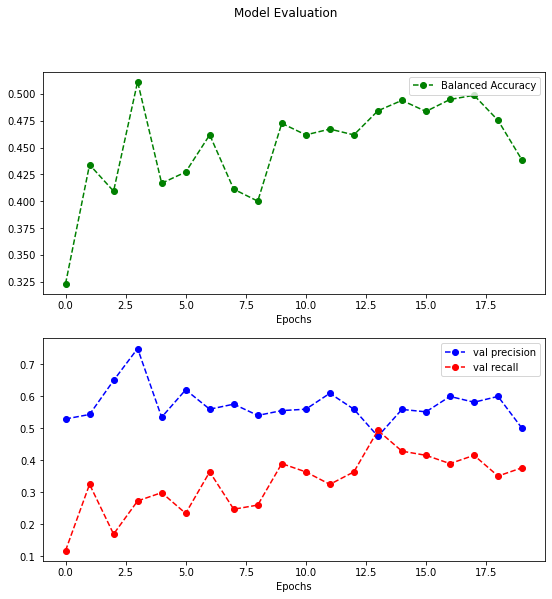

In [165]:
dtf = pd.DataFrame(model_trained.history)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9,9))
fig.suptitle('Model Evaluation')

ax1.plot((dtf.iloc[:,4]+dtf.iloc[:,5])/2,'go--',label='Balanced Accuracy')
ax1.legend()
ax1.set_xlabel('Epochs')

ax2.plot(dtf.iloc[:,4],'bo--',label='val precision')
ax2.plot(dtf.iloc[:,5],'ro--',label='val recall')
ax2.legend()
ax2.set_xlabel('Epochs')

plt.show()

Network using image information


In [7]:

novo = np.reshape(X_train,(6254,28,28,3))
print(novo)

[[[[199 172 189]
   [196 169 186]
   [196 167 185]
   ...
   [196 172 185]
   [195 172 182]
   [193 170 178]]

  [[195 168 185]
   [196 169 186]
   [199 170 188]
   ...
   [198 174 187]
   [196 173 183]
   [195 172 180]]

  [[194 170 186]
   [197 173 189]
   [203 176 193]
   ...
   [199 175 188]
   [198 175 185]
   [197 174 184]]

  ...

  [[186 160 161]
   [188 163 166]
   [192 167 171]
   ...
   [176 148 134]
   [184 154 143]
   [186 156 145]]

  [[178 153 156]
   [179 157 159]
   [183 161 164]
   ...
   [188 158 148]
   [187 154 147]
   [184 151 144]]

  [[171 149 151]
   [175 153 155]
   [179 157 160]
   ...
   [187 157 149]
   [182 149 144]
   [178 145 140]]]


 [[[241 184 199]
   [240 186 200]
   [241 187 203]
   ...
   [235 175 187]
   [230 170 182]
   [227 167 179]]

  [[242 185 200]
   [241 184 199]
   [238 184 200]
   ...
   [237 177 189]
   [232 172 184]
   [230 170 182]]

  [[242 183 201]
   [240 183 200]
   [236 182 198]
   ...
   [238 180 194]
   [233 175 187]
   [231 173

In [ ]:
#data augmentation
tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),

Epoch 1/10
45/45 [==============================] - 4s 66ms/step - loss: 0.6680 - precision_33: 0.8385 - recall_33: 0.8385 - val_loss: 0.3601 - val_precision_33: 0.8460 - val_recall_33: 0.8460
Epoch 2/10
45/45 [==============================] - 3s 60ms/step - loss: 0.3282 - precision_33: 0.8580 - recall_33: 0.8580 - val_loss: 0.3420 - val_precision_33: 0.8460 - val_recall_33: 0.8460
Epoch 3/10
45/45 [==============================] - 3s 61ms/step - loss: 0.3219 - precision_33: 0.8585 - recall_33: 0.8585 - val_loss: 0.3438 - val_precision_33: 0.8500 - val_recall_33: 0.8500
Epoch 4/10
45/45 [==============================] - 3s 60ms/step - loss: 0.3187 - precision_33: 0.8604 - recall_33: 0.8604 - val_loss: 0.3238 - val_precision_33: 0.8600 - val_recall_33: 0.8600
Epoch 5/10
45/45 [==============================] - 3s 59ms/step - loss: 0.3099 - precision_33: 0.8672 - recall_33: 0.8672 - val_loss: 0.3284 - val_precision_33: 0.8540 - val_recall_33: 0.8540
Epoch 6/10
45/45 [=================

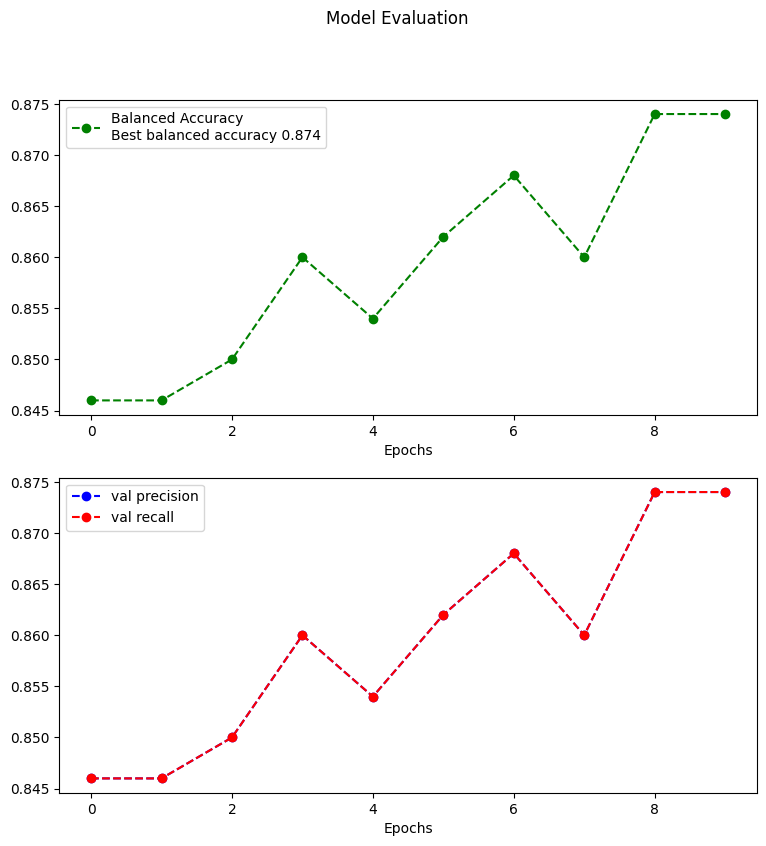

In [165]:


model2, model_history2 = neural_defandTrain("adam", "binary_crossentropy" ,10,128,3,3, X_train, y_train, True)


In [163]:

def neural_defandTrain(optimizer_string, loss_string ,epoch_nr,batch,nrconvlayers, nrdesnelayers, x_all, y_all, data_augmentation_bool):

    X_train_sample, y_train_sample, X_validation, y_validation = x_y_preprocessing (x_all, y_all, data_augmentation_bool)

    model = model_def(optimizer_string, loss_string, nrconvlayers, nrdesnelayers)

    model_history = model.fit(
        X_train_sample,
        y_train_sample,
        batch_size=batch,
        epochs=epoch_nr,
        # We pass some validation for
        # monitoring validation loss and metrics
        # at the end of each epoch
        validation_data=(X_validation, y_validation)
    )
    best_balancedAccuracy = plot_neuralmodel(model_history)
    
    save_model(model, model_history, optimizer_string, loss_string ,epoch_nr,batch, best_balancedAccuracy, nrconvlayers, nrdesnelayers)

    return model, model_history


In [161]:
### Neural Network
def model_def(optimizer_string, loss_string, nrconvlayers, nrdesnelayers):
    model_img= keras.Sequential()
    model_img.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,3)))
    model_img.add(layers.MaxPooling2D(pool_size=(2, 2)))
    for i in range(nrconvlayers-1):
        model_img.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))

    #we do not need to use a maxpooling layer after each convolution layer, but it helps reducing computacional load
    if nrconvlayers>4:
        model_img.add(layers.MaxPooling2D(pool_size=(2, 2))) #if we have to many conv layers - a maxpooling is adequado

    model_img.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))     #for simple image convolution 2-4 conv layers should be enougth. The number of filters in 
    model_img.add(layers.MaxPooling2D(pool_size=(2, 2)))                        #each layer should start with 32-64 and increase with deeper layers, which enables the CNN to learn more abstract patterns
    
    #dense layers
    model_img.add(layers.Flatten())
    model_img.add(layers.Dense(256, activation='relu'))
    for i in range(nrdesnelayers-1):
        model_img.add(layers.Dense(64, activation='relu'))
    model_img.add(layers.Dense(2, activation='softmax'))
    

    model_img.compile(
            optimizer = optimizer_string,
            # Optimizer: use either ADAM or SGDM
            # Loss function to minimize
            loss = loss_string,
            # List of metrics to monitor
            metrics=[keras.metrics.Precision(),keras.metrics.Recall()]
        )

    return model_img



In [144]:
from pathlib import Path, PureWindowsPath

def save_model (model_fitted, model_history, optimizer_string, loss_string ,epoch_nr,batch,best_balancedAccuracy, nrconvlayers, nrdesnelayers ):
    
    #define names for the files
    file_name_model=f"bestbacc_{best_balancedAccuracy}  layers_{nrconvlayers}_{nrdesnelayers}  {optimizer_string}  {loss_string}  Epoch_{epoch_nr}  Batch_{batch}  Model.keras"
    #model_path=Path(r'C:\Users\alexa\OneDrive - Universidade de Lisboa\4º Ano\1º Semestre - MEEC\Aprendizagem Automática\Labs2\ML_Aaut',file_name_model)
    file_name_history=f"bestbacc_{best_balancedAccuracy}  layers_{nrconvlayers}_{nrdesnelayers}  {optimizer_string}  {loss_string}  Epoch_{epoch_nr}  Batch_{batch}  History.npy"
    #history_path=Path(r'C:\Users\alexa\OneDrive - Universidade de Lisboa\4º Ano\1º Semestre - MEEC\Aprendizagem Automática\Labs2\ML_Aaut',file_name_history)

    #save the model in a .keras file
    model_fitted.save(file_name_model)
    #save history to numpy array
    np.save(file_name_history,model_history.history)







    

In [114]:
def plot_neuralmodel(model):
    dtf = pd.DataFrame(model.history)
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9,9))
    fig.suptitle('Model Evaluation')

    best_bacc =round(max((dtf.iloc[:,4]+dtf.iloc[:,5])/2),4)
   

    ax1.plot((dtf.iloc[:,4]+dtf.iloc[:,5])/2,'go--',label=f'Balanced Accuracy\nBest balanced accuracy {best_bacc}')
    
    ax1.legend()
    ax1.set_xlabel('Epochs')

    ax2.plot(dtf.iloc[:,4],'bo--',label='val precision')
    ax2.plot(dtf.iloc[:,5],'ro--',label='val recall')
    ax2.legend()
    ax2.set_xlabel('Epochs')

    plt.show()
    return best_bacc






In [1]:
def x_y_preprocessing(x,y, data_augmentation_bool):
    X_train_img = np.reshape(X_train,(6254,28,28,3)).copy()
    X_val, X_train_sample = X_train_img[:500].copy(), X_train_img[500:].copy()
    y_val, y_train_sample = y_train[:500].copy(), y_train[500:].copy()

    X_train_augmented, y_train_augmented = data_augmentation(X_train_sample, y_train_sample)

    y_train_2labels = keras.utils.to_categorical(y_train_sample, num_classes=2)
    y_val_2labels = keras.utils.to_categorical(y_val, num_classes=2)
    y_train_augmented_2labels = keras.utils.to_categorical(y_train_augmented, num_classes=2)
    
    if data_augmentation_bool:
        return X_train_augmented, y_train_augmented_2labels, X_val, y_val_2labels
    else:
        return X_train_sample, y_train_2labels, X_val, y_val_2labels



In [ ]:
def data_augmentation(x, y):



    return x_augmented, y_augmented